<a href="https://colab.research.google.com/github/devbispo/curso-python/blob/main/Maquina_vetor_suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''Uma Máquina de Vetores de Suporte (SVM) é um modelo muito poderoso e versátil
de Aprendizado de Máquina capaz de realizar classificações lineares ou não lineares,
de regressão e até mesmo detecção de outliers. É um dos modelos mais populares no
Aprendizado de Máquina e qualquer pessoa interessada no tema deve tê-lo em sua caixa
de ferramentas. As SVM são particularmente adequadas para a classificação de conjuntos
de dados complexos, porém de pequeno ou médio porte.'''

In [ ]:
'''O código do Scikit-Learn a seguir carrega o conjunto de dados contraceptivos da 
indonesia, converte para o arquivo .pkl e escalona as características e treina um modelo SVM linear 
(utilizando a classe LinearSVC com C = 1)'''

In [1]:
import pandas as pd    #Carregando base de dados
import numpy as np
base = pd.read_csv('cmc.csv')
base.shape

(1472, 10)

In [2]:
previsores = base.iloc[:,0:9].values
classe = base.iloc[:,9].values
previsores

array([[45,  1,  3, ...,  3,  4,  0],
       [43,  2,  3, ...,  3,  4,  0],
       [42,  3,  2, ...,  3,  3,  0],
       ...,
       [39,  3,  3, ...,  1,  4,  0],
       [33,  3,  3, ...,  2,  2,  0],
       [17,  3,  3, ...,  2,  4,  0]])

In [3]:
from sklearn.preprocessing import LabelEncoder
mci = LabelEncoder()
previsores[:,0] = mci.fit_transform(previsores[:,0])
previsores[:,1] = mci.fit_transform(previsores[:,1])
previsores[:,2] = mci.fit_transform(previsores[:,2])
previsores[:,3] = mci.fit_transform(previsores[:,3])
previsores[:,4] = mci.fit_transform(previsores[:,4])
previsores[:,5] = mci.fit_transform(previsores[:,5])
previsores[:,6] = mci.fit_transform(previsores[:,6])
previsores[:,7] = mci.fit_transform(previsores[:,7])
previsores[:,8] = mci.fit_transform(previsores[:,8])


classe = mci.fit_transform(classe)
classe

array([0, 0, 0, ..., 2, 2, 2])

In [4]:
from sklearn.model_selection import train_test_split
x_cmc_treinamento, x_cmc_teste, y_cmc_treinamento, y_cmc_teste = train_test_split(previsores, classe, test_size = 0.25, random_state=0)


In [13]:

import pandas as np
import numpy as np
np.set_printoptions(threshold=np.inf)
import pickle 
with open('cmc.pkl', mode = 'wb') as f:
   pickle.dump([x_cmc_treinamento,y_cmc_treinamento, x_cmc_teste,  y_cmc_teste], f)

0.5353260869565217

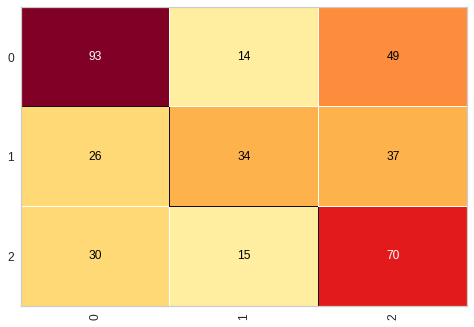

In [14]:
from sklearn.svm import SVC
import pickle 
with open('cmc.pkl', mode = 'rb') as f:
  x_cmc_treinamento, y_cmc_treinamento, x_cmc_teste, y_cmc_teste = pickle.load(f)
svm_cmc = SVC(kernel='linear', C = 1)
svm_cmc.fit(x_cmc_treinamento, y_cmc_treinamento)
previsores = svm_cmc.predict(x_cmc_teste)
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_cmc_teste, previsores)
from yellowbrick.classifier import ConfusionMatrix
cmc = ConfusionMatrix(svm_cmc)
cmc.fit(x_cmc_treinamento, y_cmc_treinamento)
cmc.score(x_cmc_teste, y_cmc_teste)